In [17]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Define optimizer
optimizer = Adam(learning_rate=0.0001)

In [18]:
i_model_path = r'C:/Users/mital/OneDrive\Desktop/retina/new_code_live/rough/rough/m_model_4.h5'  # Human eye detection model
i_model = keras.models.load_model(i_model_path, compile=False)

j_model_path = r'C:/Users/mital/OneDrive\Desktop/retina/new_code_live/rough/rough/m_model_5.h5'  # Human eye detection model
j_model = keras.models.load_model(j_model_path, compile=False)

k_model_path = r'C:/Users/mital/OneDrive\Desktop/retina/new_code_live/rough/rough/m_model_7.h5'  # Human eye detection model
k_model = keras.models.load_model(k_model_path, compile=False)

i_model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

j_model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

k_model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)



In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'test/',
    target_size=(150, 150),  
    batch_size=32,
    class_mode='binary',
    shuffle=False  
)


# Evaluate the model on the test set
loss, accuracy = i_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
# Evaluate the model on the test set


# Evaluate the model on the test set
loss, accuracy = j_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
# Evaluate the model on the test set


# Evaluate the model on the test set
loss, accuracy = k_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
# Evaluate the model on the test set







Found 101 images belonging to 2 classes.
4/4 [==============================] - 1s 182ms/step - loss: 0.0832 - accuracy: 0.9802
Test Accuracy: 98.02%
4/4 [==============================] - 1s 188ms/step - loss: 0.3856 - accuracy: 0.8812
Test Accuracy: 88.12%
4/4 [==============================] - 1s 237ms/step - loss: 0.0312 - accuracy: 0.9802
Test Accuracy: 98.02%


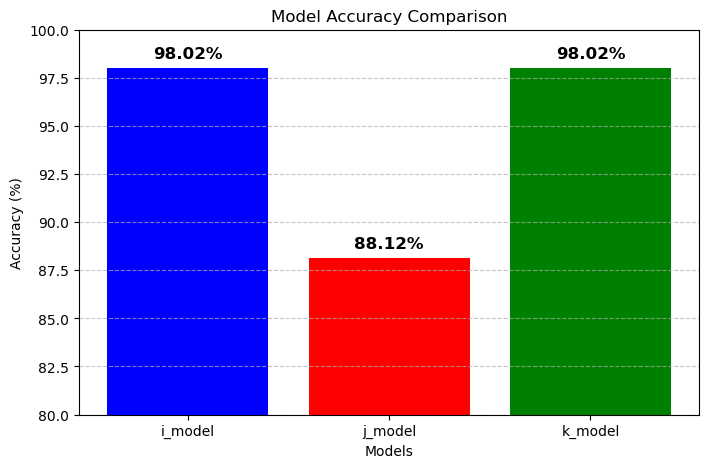

In [1]:
import matplotlib.pyplot as plt

# Models aur unki accuracy
models = ["i_model", "j_model", "k_model"]
accuracy = [98.02, 88.12, 98.02]

# Bar chart plot karna
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy, color=['blue', 'red', 'green'])

# Labels aur title set karna
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(80, 100)  # Accuracy range adjust kar raha hoon
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Accuracy values har bar pe dikhane ke liye
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.5, f"{acc}%", ha='center', fontsize=12, fontweight='bold')

# Graph show karna
plt.show()

In [20]:
def img_1(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(150, 150))  # Resize image to 150x150
    img_array = image.img_to_array(img)  # Convert the image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale pixel values to [0, 1]

    # Predict using the trained model
    prediction = i_model.predict(img_array)
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # Print the raw prediction output
    print(f"Raw prediction output: {prediction[0][0]}")
    
    # Interpretation based on threshold
    if prediction[0][0] > 0.5:
        print("Prediction: It's a mixed image (not a human eye).")
    else:
        print("Prediction: It's a human eye.")


In [21]:
def img_2(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(150, 150))  # Resize image to 150x150
    img_array = image.img_to_array(img)  # Convert the image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale pixel values to [0, 1]

    # Predict using the trained model
    prediction = j_model.predict(img_array)
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # Print the raw prediction output
    print(f"Raw prediction output: {prediction[0][0]}")
    
    # Interpretation based on threshold
    if prediction[0][0] > 0.5:
        print("Prediction: It's a mixed image (not a human eye).")
    else:
        print("Prediction: It's a human eye.")


In [22]:
def img_3(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(150, 150))  # Resize image to 150x150
    img_array = image.img_to_array(img)  # Convert the image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale pixel values to [0, 1]

    # Predict using the trained model
    prediction = k_model.predict(img_array)
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # Print the raw prediction output
    print(f"Raw prediction output: {prediction[0][0]}")
    
    # Interpretation based on threshold
    if prediction[0][0] > 0.5:
        print("Prediction: It's a mixed image (not a human eye).")
    else:
        print("Prediction: It's a human eye.")


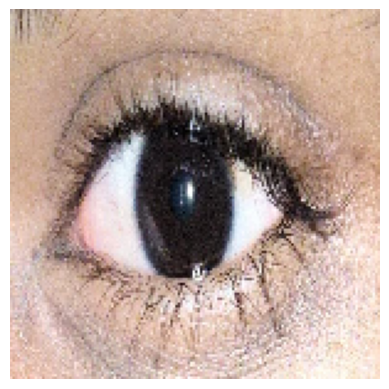

Raw prediction output: 0.4069088101387024
Prediction: It's a human eye.


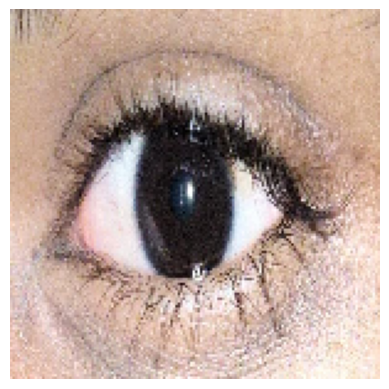

Raw prediction output: 0.9467533826828003
Prediction: It's a mixed image (not a human eye).


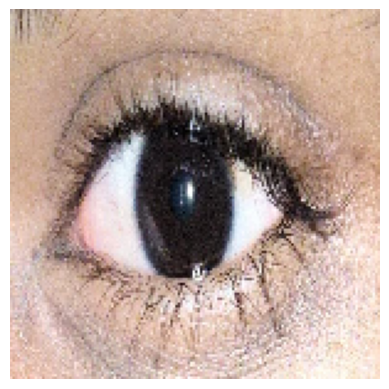

Raw prediction output: 0.05811047554016113
Prediction: It's a human eye.


In [23]:

img_1('real.jpg')
img_2('real.jpg')
img_3('real.jpg')

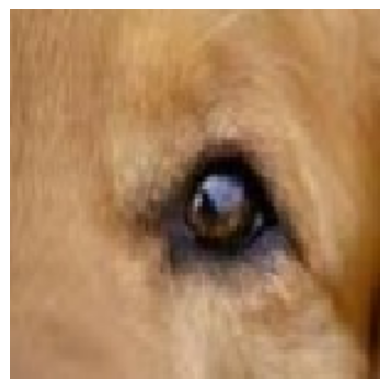

Raw prediction output: 0.8853904008865356
Prediction: It's a mixed image (not a human eye).


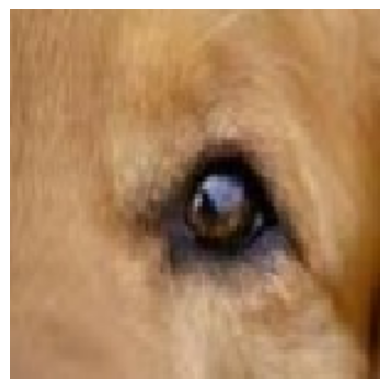

Raw prediction output: 0.9882582426071167
Prediction: It's a mixed image (not a human eye).


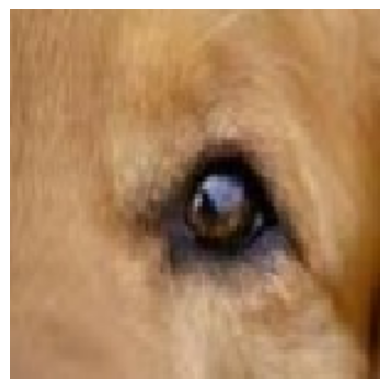

Raw prediction output: 0.8236773014068604
Prediction: It's a mixed image (not a human eye).


In [24]:
img_1('dataset/non_eye/117.jpeg')
img_2('dataset/non_eye/117.jpeg')
img_3('dataset/non_eye/117.jpeg')

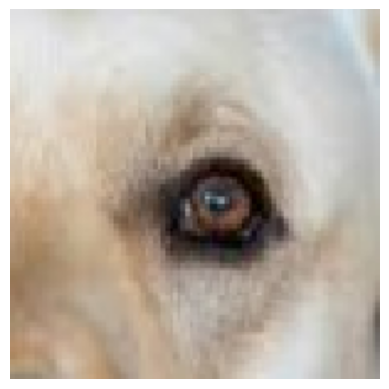

Raw prediction output: 0.15148800611495972
Prediction: It's a human eye.


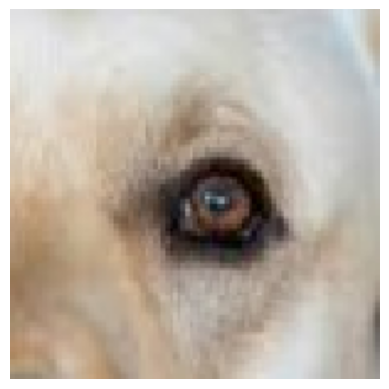

Raw prediction output: 0.9795083999633789
Prediction: It's a mixed image (not a human eye).


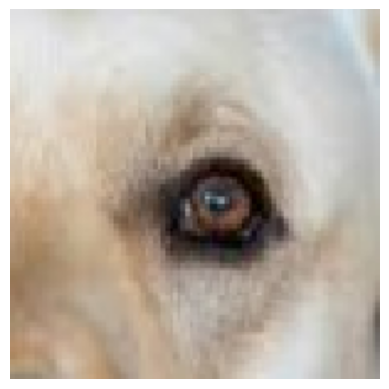

Raw prediction output: 0.9934402704238892
Prediction: It's a mixed image (not a human eye).


In [25]:
img_1('dataset/non_eye/122.jpeg')
img_2('dataset/non_eye/122.jpeg')
img_3('dataset/non_eye/122.jpeg')

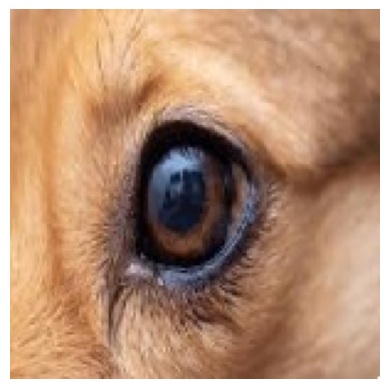

Raw prediction output: 0.8927313089370728
Prediction: It's a mixed image (not a human eye).


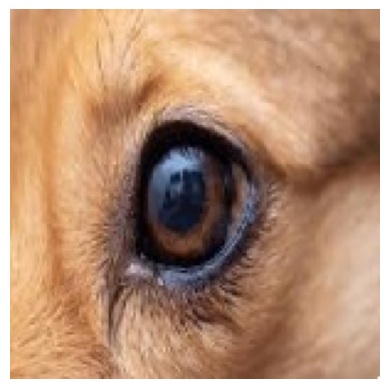

Raw prediction output: 0.9916929006576538
Prediction: It's a mixed image (not a human eye).


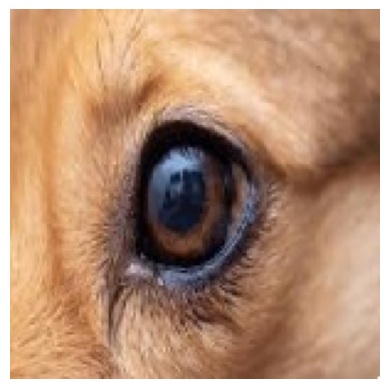

Raw prediction output: 0.9112362861633301
Prediction: It's a mixed image (not a human eye).


In [27]:
img_1('dataset/non_eye/126.jpg')
img_2('dataset/non_eye/126.jpg')
img_3('dataset/non_eye/126.jpg')